# Exercise sheet 3 Representations of data

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

## Task 1  Principal Component Analysis
### Part 1

In [2]:
data = pd.read_csv("pca_dataset.txt", sep = " ", header = None)
data = data.rename(columns={0: "x", 1: "f(x)"})
data

,x,f(x)
0,1.624345,0.767460
1,-0.611756,-0.183427
2,-0.528172,-0.223737
3,-1.072969,-0.477126
4,0.865408,0.323213
...,...,...
95,0.077340,-0.124074
96,-0.343854,-0.111695
97,0.043597,0.063827
98,-0.620001,-0.228905


<AxesSubplot: xlabel='x', ylabel='f(x)'>

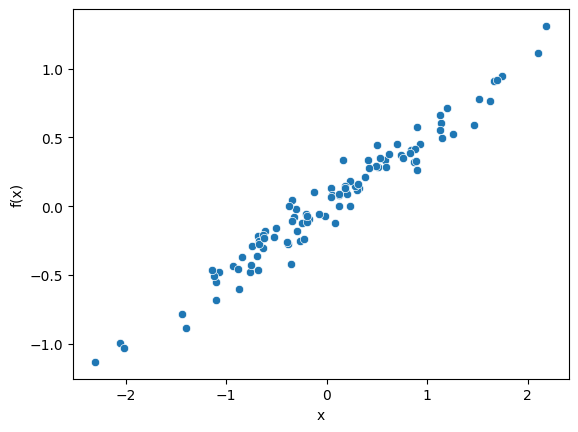

In [3]:
sns.scatterplot(data, x = "x", y = "f(x)")

In [4]:
data_avg = np.average(data)
data_bar = data - data_avg
U, S, VT = np.linalg.svd(data_bar)
print("S:\t", S)
print("energy:\t", S*S/sum(S*S))
print("V^T:\n", VT)

S:	 [9.94345787 0.83240085]
energy:	 [0.99304083 0.00695917]
V^T:
 [[-0.88939864 -0.45713243]
 [ 0.45713243 -0.88939864]]


Text(0, 0, '')

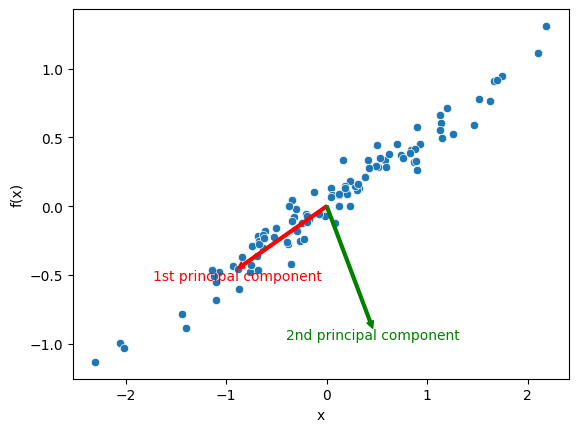

In [5]:
sns.scatterplot(data, x = "x", y = "f(x)")
plt.text(VT[0][0], VT[0][1], "1st principal component", horizontalalignment="center", verticalalignment="top", color="red")
plt.text(VT[1][0], VT[1][1], "2nd principal component", horizontalalignment="center", verticalalignment="top", color="green")
plt.annotate("", xy=(VT[0][0], VT[0][1]), xytext=(0, 0),
                  arrowprops=dict(color="red",width=2.0,headwidth=5.0,headlength=5.0))
plt.annotate("", xy=(VT[1][0], VT[1][1]), xytext=(0, 0),
                  arrowprops=dict(color="green",width=2.0,headwidth=5.0,headlength=5.0))

### Part 2

(768, 1024)


<AxesSubplot: >

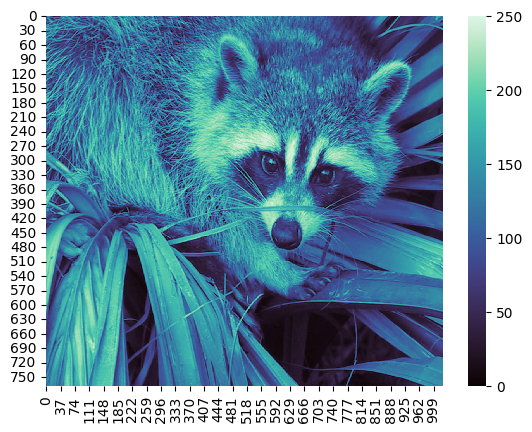

In [6]:
data = scipy.misc.face(gray=True)
print(data.shape)
sns.heatmap(data, cmap="mako")

Here we rescale the image to have size from (1024 × 768) into (249 × 185).

(185, 249)


<AxesSubplot: >

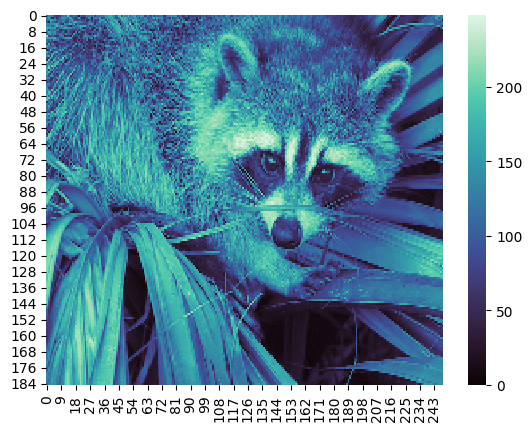

In [7]:
data = cv2.resize(data, dsize=(249, 185), interpolation=cv2.INTER_CUBIC)
print(data.shape)
sns.heatmap(data, cmap="mako")

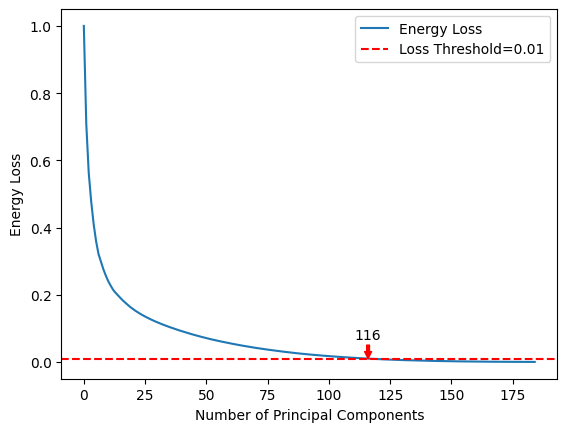

In [8]:
data_avg = np.average(data)
data_bar = data - data_avg
U, S, VT = np.linalg.svd(data_bar)
size = S.size

energy = S*S/sum(S*S)
energy_loss = [] 
energy_loss_threshold = 0.01
energy_loss_index = size
for i in range(size):
    loss =  1-np.sum(energy[:i ])
    if loss < energy_loss_threshold and energy_loss_index == size:
        energy_loss_index = i
        flag = False
    energy_loss.append(loss)

sns.lineplot(energy_loss, label="Energy Loss")
plt.xlabel("Number of Principal Components")
plt.ylabel("Energy Loss")
plt.axhline(energy_loss_threshold, color="r", xmin=0, xmax=size, linestyle="dashed", label="Loss Threshold="+str(energy_loss_threshold))
plt.text(energy_loss_index, energy_loss_threshold, str(energy_loss_index)+"\n", horizontalalignment="center", verticalalignment="bottom")
plt.annotate("", xy=(energy_loss_index, energy_loss_threshold), xytext=(energy_loss_index, energy_loss_threshold + 0.04),
                  arrowprops=dict(color="r",width=2.0,headwidth=5.0,headlength=5.0))
plt.legend()

<AxesSubplot: >

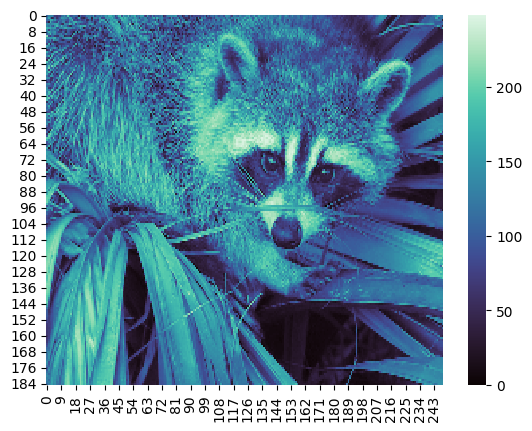

In [9]:
r = 185
U_r = U[:,:r]
S_r = S[:r]
VT_r = VT[:r, :]

data_bar_r = np.matmul(np.matmul(U_r, np.diag(S_r)), VT_r)
data_r = data_bar_r + data_avg
sns.heatmap(data_r, cmap="mako")

<AxesSubplot: >

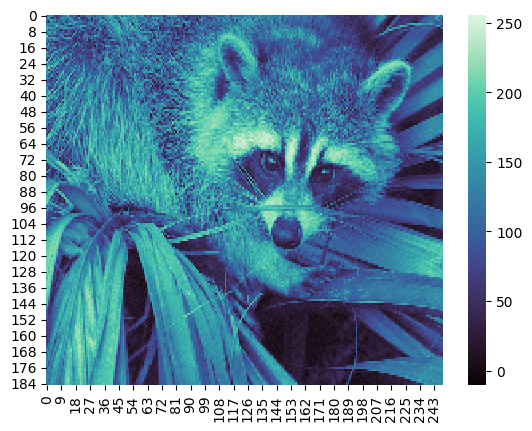

In [10]:
r = 120
U_r = U[:, :r]
S_r = S[:r]
VT_r = VT[:r, :]

data_bar_r = np.matmul(np.matmul(U_r, np.diag(S_r)), VT_r)
data_r = data_bar_r + data_avg
sns.heatmap(data_r, cmap="mako")

<AxesSubplot: >

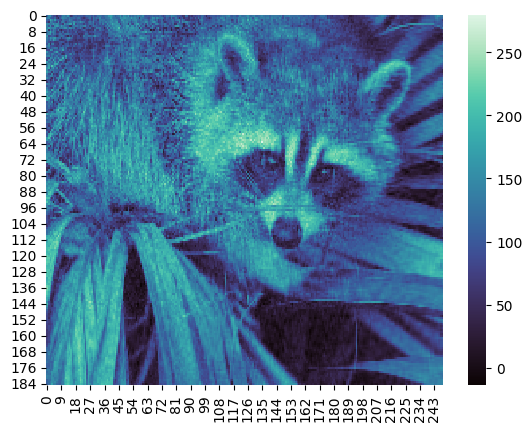

In [11]:
r = 50
U_r = U[:,:r]
S_r = S[:r]
VT_r = VT[:r, :]

data_bar_r = np.matmul(np.matmul(U_r, np.diag(S_r)), VT_r)
data_r = data_bar_r + data_avg
sns.heatmap(data_r, cmap="mako")

<AxesSubplot: >

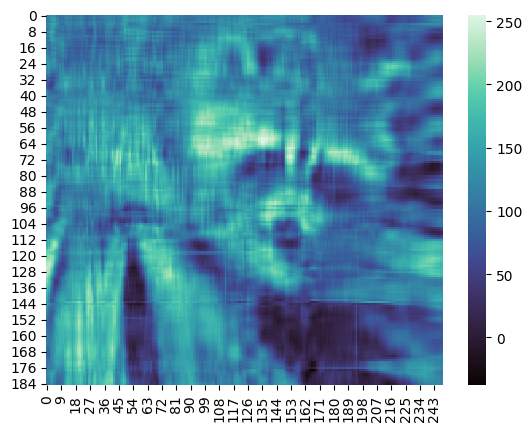

In [12]:
r = 10
U_r = U[:,:r]
S_r = S[:r]
VT_r = VT[:r, :]

data_bar_r = np.matmul(np.matmul(U_r, np.diag(S_r)), VT_r)
data_r = data_bar_r + data_avg
sns.heatmap(data_r, cmap="mako")

### Part 3

In [13]:
data = np.loadtxt("data_DMAP_PCA_vadere.txt")
#data
data.shape

(1000, 30)

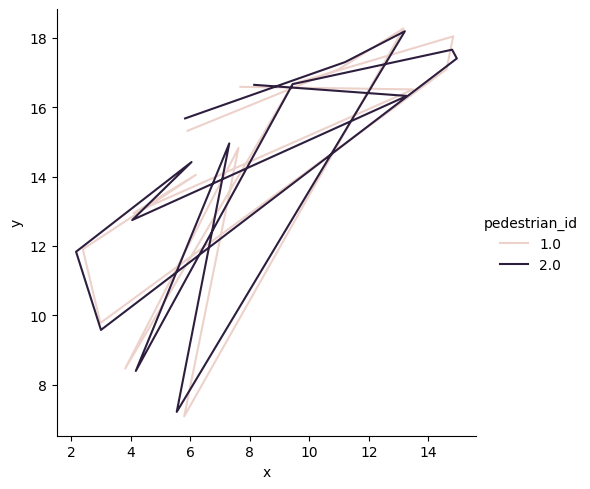

In [14]:
def task_1_part_3_plot(data):
    data_records = {"pedestrian_id":[], "x":[], "y":[], "time":[]}
    data_records = pd.DataFrame(data_records)
    pedestrian_id = 0
    pedestrian_number = 2

    for record in data[:pedestrian_number]:
        pedestrian_id += 1
        tmp_x = 0
        for position in range(record.size):
            if position % 2:
                tmp_y = record[position]
                time = position // 2
                data_records.loc[len(data_records.index)] = [pedestrian_id, tmp_x, tmp_y, time]
            else:
                tmp_x = record[position]

    sns.relplot(
        data=data_records, kind="line",
        x="x", y="y", hue="pedestrian_id",
        sort=False
    )
task_1_part_3_plot(data)

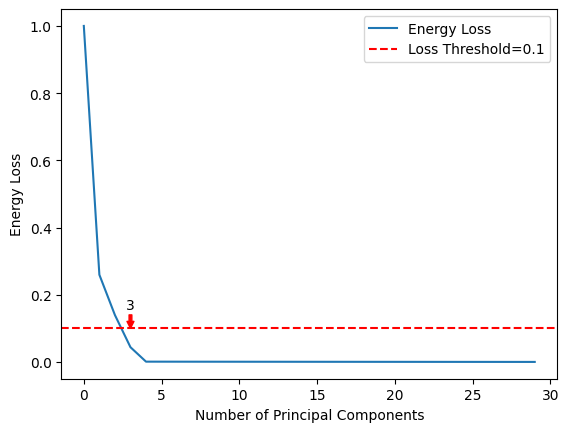

In [15]:
data_avg = np.average(data)
data_bar = data - data_avg
U, S, VT = np.linalg.svd(data_bar)
size = S.size

energy = S*S/sum(S*S)
energy_loss = [] 
energy_loss_threshold = 0.1
energy_loss_index = size
for i in range(size):
    loss =  1-np.sum(energy[:i])
    if loss < energy_loss_threshold and energy_loss_index == size:
        energy_loss_index = i
        flag = False
    energy_loss.append(loss)
#print(energy_loss)

sns.lineplot(energy_loss, label="Energy Loss")
plt.xlabel("Number of Principal Components")
plt.ylabel("Energy Loss")
plt.axhline(energy_loss_threshold, color="r", xmin=0, xmax=size, linestyle="dashed", label="Loss Threshold="+str(energy_loss_threshold))
plt.text(energy_loss_index, energy_loss_threshold, str(energy_loss_index)+"\n", horizontalalignment="center", verticalalignment="bottom")
plt.annotate("", xy=(energy_loss_index, energy_loss_threshold), xytext=(energy_loss_index, energy_loss_threshold + 0.04),
                  arrowprops=dict(color="r",width=2.0,headwidth=5.0,headlength=5.0))
plt.legend()

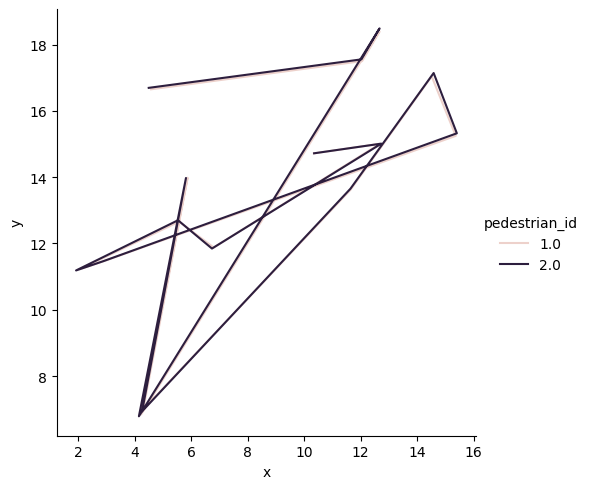

In [16]:
r = 2
U_r = U[:,:r]
S_r = S[:r]
VT_r = VT[:r, :]

data_bar_r = np.matmul(np.matmul(U_r, np.diag(S_r)), VT_r)
data_r = data_bar_r + data_avg
task_1_part_3_plot(data_r)

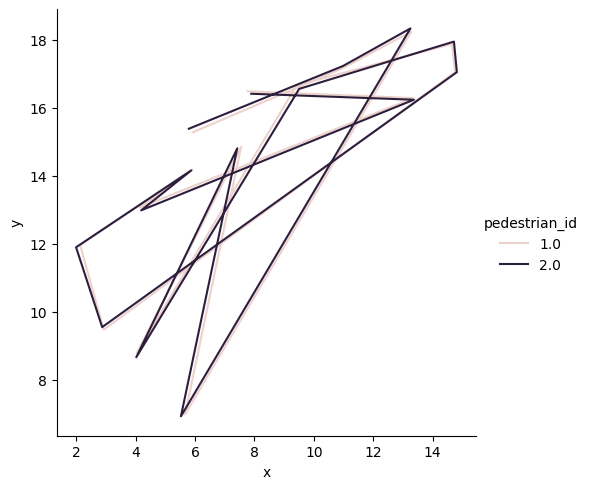

In [17]:
r = 3
U_r = U[:,:r]
S_r = S[:r]
VT_r = VT[:r, :]

data_bar_r = np.matmul(np.matmul(U_r, np.diag(S_r)), VT_r)
data_r = data_bar_r + data_avg
task_1_part_3_plot(data_r)

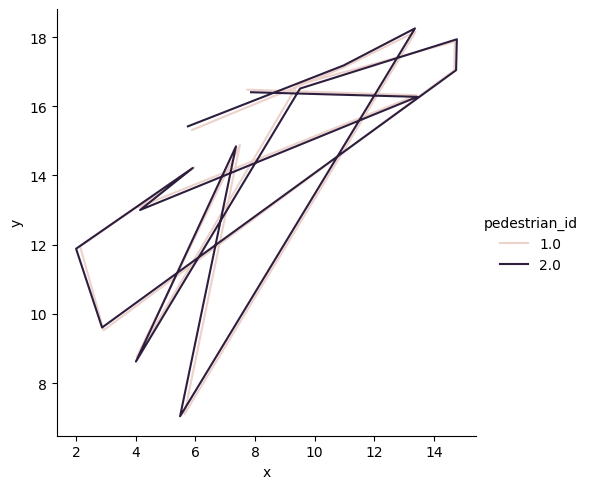

In [18]:
r = 4
U_r = U[:,:r]
S_r = S[:r]
VT_r = VT[:r, :]

data_bar_r = np.matmul(np.matmul(U_r, np.diag(S_r)), VT_r)
data_r = data_bar_r + data_avg
task_1_part_3_plot(data_r)